### Encoding Numerical Values to convert this into Categorical data

There are 2 techniques to convert numerical to categorical.
1. Discretization (Binning)
2. Binarization

<b>Discretization</b> : It is the process of transforming continuos variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable's values. Discretization is also called binning, where bin is an alternative name of interval.

<b>Why we use Discretization</b> : 
1. To handle Outliers
2. To improve the value spread

<h4>Types of Binning</h4> :
1. Unsupervised Binning
    1. Equal Width/Uniform Binning
    2. Equal Frequency/Quantile Binning
    3. K Means Binning
2. Supervised Binning
    1. Decision Tree Binning
3. Custom Binning - Jokhon interval amra business logic theke custom vabe dibo tokhon seta Custom Binning hobe. Er jonno scikit learn use korte parbo na amader ke pandas e nijeder logic wise code lekha lagbe

<b>Equal/Uniform Width Binning</b>: 
Bins(class difference). No of intervals = (max - min)/Bins

<b>Benefits</b> :
        1. Handles Outlier
        2. No Change in spread

<b>Equal Frequency/Quantile Binning</b>: Jodi n numbers of Interval lage, tahole total_value*n% data prottek interval e thakbe. Like interval chai 10 ta tahole prottek interval e total data er 10% data thakbe

<b>Benefits</b> :
        1. Handles Outlier
        2. Values spread ke uniform banay

<b>K Means Binnig</b>: K Means algorithm er motoi

<b>Benefits</b> :
        1. Handles Outlier
        2. Values spread ke uniform banay


We can implement bining using scikit learn. There we would use KBinsDiscretizer. We have to provide 3 things here, 
1. Number of bins
2. stratefy(uniform/quantile/kmeans)
3. Encoding(ordinal/onehotencoding)



<h4>Binarization</h4>
In binning we convert a continuous values into discrete values, whereas in Binarization we convert continuous values into binrary values.

There is a function called <b>Binarized</b> in scikit learn through which we can achieve Binarization. It takes two parameters 1. threshold(niche hole true, upore hole false), 2. copy(true dile new column banaye change korbe, false dile same column ei change korbe)

## CODE

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(331, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [7]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [13]:
accuracy_score(y_test,y_pred)

0.582089552238806

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.5619429590017825

In [20]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [21]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [22]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [24]:
trf.named_transformers_['first'].n_bins_

array([10])

In [25]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.33, 17.  , 20.  , 23.  , 25.2 , 29.  , 32.  , 37.  , 43.8 ,
              50.  , 76.  ])                                                ],
      dtype=object)

In [27]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [28]:
output['age_labels'] = pd.cut(x=x_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [29]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
162,26.0,4.0,13.5000,4.0,"(25.2, 29.0]","(13.0, 16.0]"
40,39.0,7.0,13.4167,4.0,"(37.0, 43.8]","(13.0, 16.0]"
386,24.0,3.0,7.7750,1.0,"(23.0, 25.2]","(7.75, 7.896]"
405,20.0,2.0,13.8625,4.0,"(17.0, 20.0]","(13.0, 16.0]"
270,46.0,8.0,75.2417,8.0,"(43.8, 50.0]","(58.41, 92.45]"


In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [31]:
accuracy_score(y_test,y_pred2)

0.5223880597014925

In [32]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.5590017825311943

In [38]:
# function
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("After")

    plt.show()

0.5711229946524063


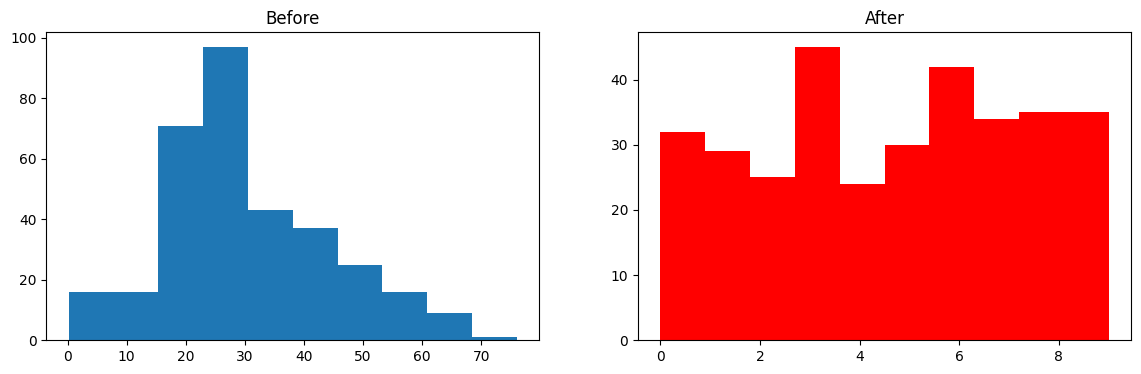

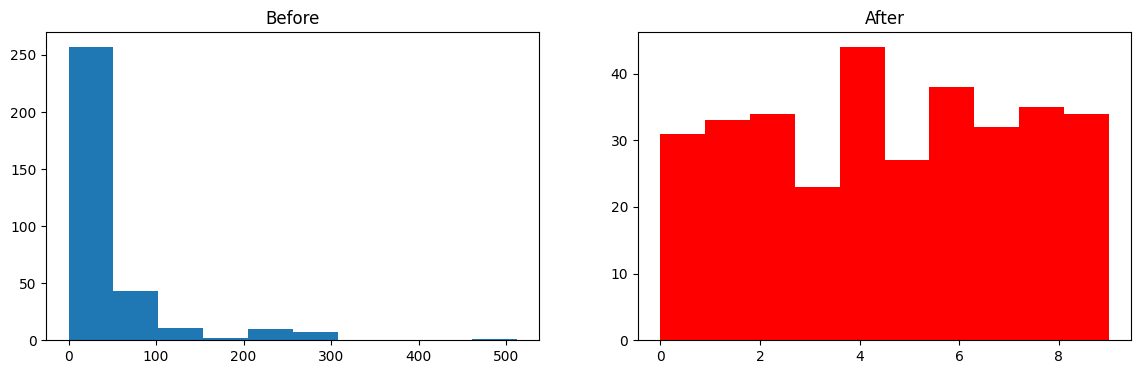

In [39]:
discretize(10,'quantile')

0.5680035650623886


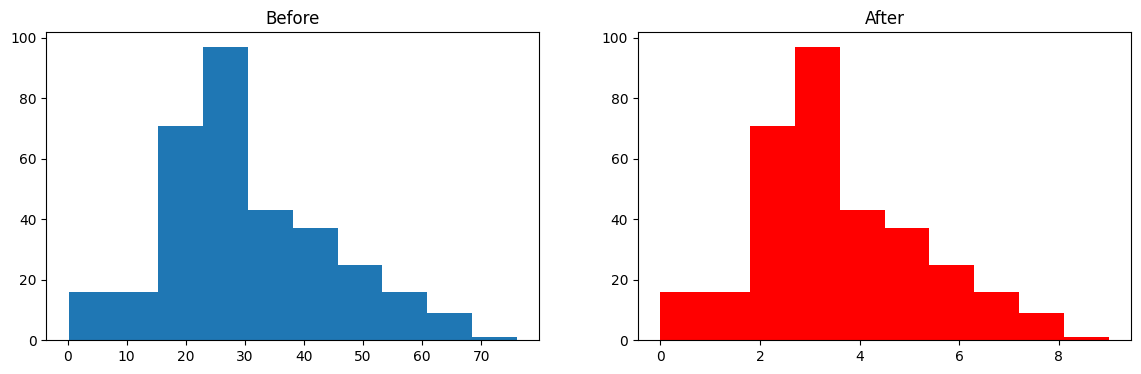

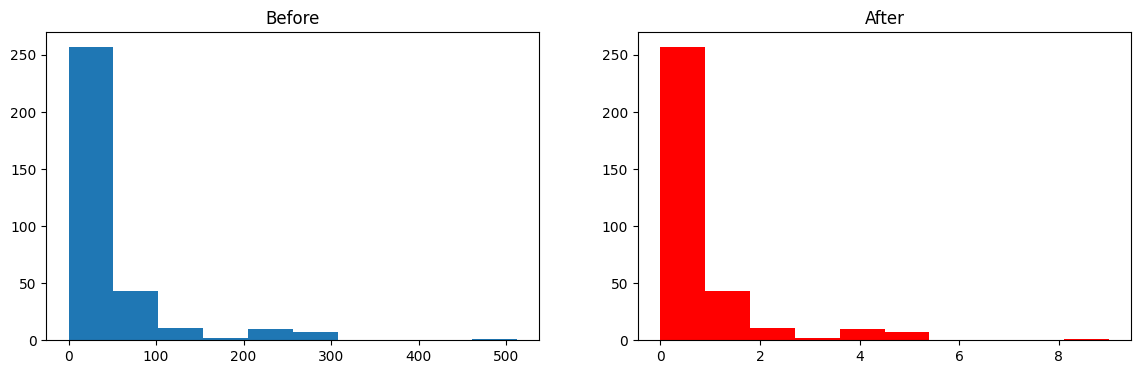

In [40]:
discretize(10,'uniform')

0.5680926916221033


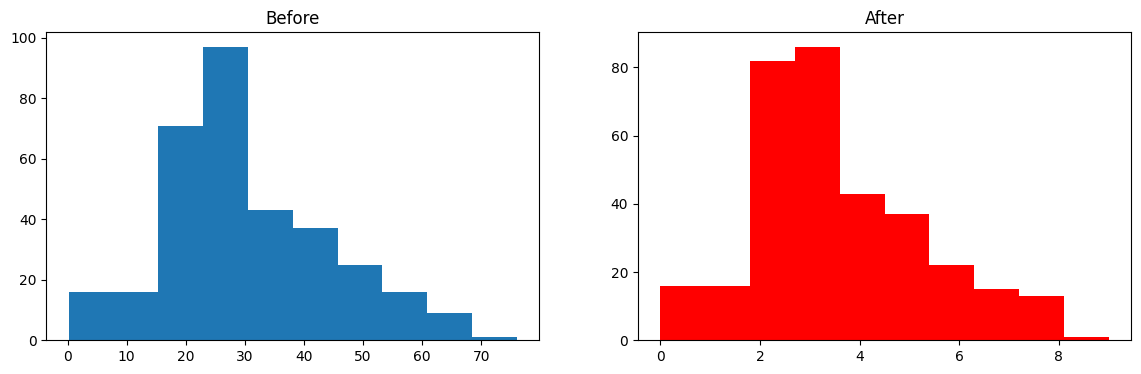

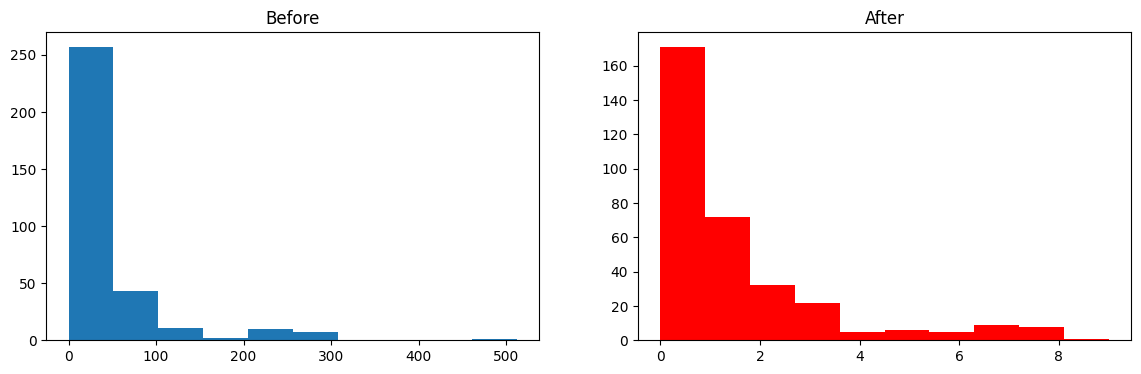

In [41]:
discretize(10,'kmeans')

## Binarization

In [53]:
df2 = pd.read_csv('titanic.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [55]:
df2.dropna(inplace=True)

In [56]:
df2.head()

,Age,Fare,SibSp,Parch,Survived
0,34.5,7.8292,0,0,0
1,47.0,7.0000,1,0,1
2,62.0,9.6875,0,0,0
3,27.0,8.6625,0,0,0
4,22.0,12.2875,1,1,1


In [57]:
df2['family'] = df2['SibSp'] + df2['Parch']

In [60]:
df2.head()

,Age,Fare,SibSp,Parch,Survived,family
0,34.5,7.8292,0,0,0,0
1,47.0,7.0000,1,0,1,1
2,62.0,9.6875,0,0,0,0
3,27.0,8.6625,0,0,0,0
4,22.0,12.2875,1,1,1,2


In [61]:
df2.drop(columns=['SibSp','Parch'],inplace=True)

In [62]:
df2.head()

,Age,Fare,Survived,family
0,34.5,7.8292,0,0
1,47.0,7.0000,1,1
2,62.0,9.6875,0,0
3,27.0,8.6625,0,0
4,22.0,12.2875,1,2


In [66]:
x = df2.drop(columns=['Survived'])
y = df2['Survived']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
x_train.head()

,Age,Fare,family
281,0.75,13.7750,2
96,76.00,78.8500,1
341,32.00,7.5792,0
18,27.00,7.9250,1
26,22.00,61.9792,1


In [69]:
# Without Binarization
clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.582089552238806

In [70]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.5983957219251337

In [71]:
from sklearn.preprocessing import Binarizer

In [72]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [73]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [74]:
pd.DataFrame(x_train_trf,columns=['Family','Age','Fare'])

,Family,Age,Fare
0,1.0,0.75,13.7750
1,1.0,76.00,78.8500
2,0.0,32.00,7.5792
3,1.0,27.00,7.9250
4,1.0,22.00,61.9792
...,...,...,...
259,0.0,20.00,7.2250
260,0.0,27.00,7.8792
261,0.0,43.00,7.8958
262,0.0,16.00,7.6500


In [76]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

accuracy_score(y_test,y_pred2)

0.6119402985074627

In [77]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x_trf,y,cv=10,scoring='accuracy'))

0.604367201426025